In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import utils
import ssh_command as ssh
import image_process as imp
import gpyopt_optimizer as gpyopt

### Test the connection to OT2

In [2]:
OT2_IP = '169.254.74.32'
ssh.ssh_connect(OT2_IP)

In [3]:
ssh.transfer_and_simulate_protocol(OT2_IP, 'color_test.csv', 'color_mixing.py')

/data
['colorA' 'colorB' 'colorC' 'DispensePos']
[10]
[40]
[150]
['A1']
Picking up tip from B1 of Opentrons 96 Tip Rack 300 µL on 10
Logs from this command:
WARNING (util): Out of bounds move: X=(418.00000000000006 motor controller, 417.52637982768243 deck) too high for limit 418.0
Aspirating 55.0 uL from C5 of Corning 96 Well Plate 360 µL Flat on 8 at 92.86 uL/sec
Aspirating 10.0 uL from F8 of Opentrons 96 Tip Rack 300 µL on 9 at 46.43 uL/sec
Air gap
	Aspirating 10.0 uL from F8 of Opentrons 96 Tip Rack 300 µL on 9 at 92.86 uL/sec
Dispensing 75.0 uL into A1 of Corning 96 Well Plate 360 µL Flat on 4 at 92.86 uL/sec
Blowing out at A1 of Corning 96 Well Plate 360 µL Flat on 4
Mixing 1 times with a volume of 300.0 ul
	Aspirating 300.0 uL from C5 of Corning 96 Well Plate 360 µL Flat on 7 at 92.86 uL/sec
	Dispensing 300.0 uL into C5 of Corning 96 Well Plate 360 µL Flat on 7 at 92.86 uL/sec
Blowing out
Dropping tip into B1 of Opentrons 96 Tip Rack 300 µL on 10
Picking up tip from B2 of Opentr

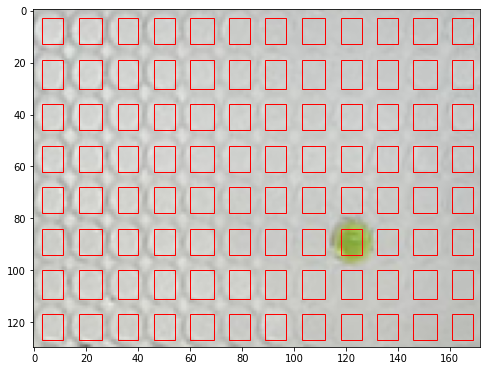

In [12]:
image_name = 'test.jpg'
ssh.ssh_take_an_image(OT2_IP, image_name)

## image processing and RGB extraction
image_ROI = imp.image_extractor(image_name)

### Initial Sampling

In [9]:
# RGB_ref should be replaced by the reference RGB measurement   
batch_size = 1
#random sampling is required to initialize the search
X_init = []
for i in range(5):
    X_init.append(np.random.random(3))
X_init = np.array([x/np.sum(x) for x in X_init])
print(np.round(X_init*200))

[[ 64.  87.  49.]
 [ 48.  44. 108.]
 [ 67.  86.  47.]
 [ 78.  95.  27.]
 [  8.  41. 151.]]


### Gonna Drop the Bayes

Iteration: BO_R0
Suggested Liquid Amount [µL]
   colorA [uL]  colorB [uL]  colorC [uL] dispense pos
0         64.0         87.0         49.0           D1
1         48.0         44.0        108.0           D2
2         67.0         86.0         47.0           D3
3         78.0         95.0         27.0           D4
4          8.0         41.0        151.0           D5
/data
['colorA [uL]' 'colorB [uL]' 'colorC [uL]' 'dispense pos']
[64.0 48.0 67.0 78.0 8.0]
[87.0 44.0 86.0 95.0 41.0]
[49.0 108.0 47.0 27.0 151.0]
['D1' 'D2' 'D3' 'D4' 'D5']
Picking up tip from B1 of Opentrons 96 Tip Rack 300 µL on 10
Logs from this command:
WARNING (util): Out of bounds move: X=(418.00000000000006 motor controller, 417.52637982768243 deck) too high for limit 418.0
Aspirating 55.0 uL from C5 of Corning 96 Well Plate 360 µL Flat on 8 at 92.86 uL/sec
Aspirating 64.0 uL from F8 of Opentrons 96 Tip Rack 300 µL on 9 at 46.43 uL/sec
Air gap
	Aspirating 10.0 uL from F8 of Opentrons 96 Tip Rack 300 µL on 9 at 92.8

/data
This is intended to run on a robot, and while it can connect to a smoothie via a usb/serial adapter unexpected things using gpios (such as smoothie reset or light management) will fail. If you are seeing this message and you are running on a robot, you need to set the RUNNING_ON_PI environmental variable to 1.
Failed to initialize character device, will not be able to control gpios (lights, button, smoothiekill, smoothie reset). Only one connection can be made to the gpios at a time. If you need to control gpios, first stop the robot server with systemctl stop opentrons-robot-server. Until you restart the server with systemctl start opentrons-robot-server, you will be unable to control the robot using the Opentrons app.
Out of bounds move: X=(418.00000000000006 motor controller, 417.5215894108155 deck) too high for limit 418
Out of bounds move: X=(418.00000000000006 motor controller, 417.5215894108155 deck) too high for limit 418
Out of bounds move: X=(418.00000000000006 motor co

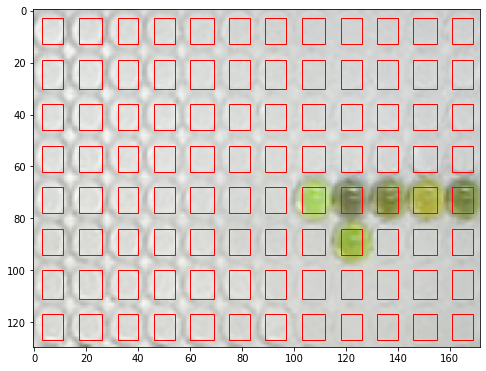

reference color sample


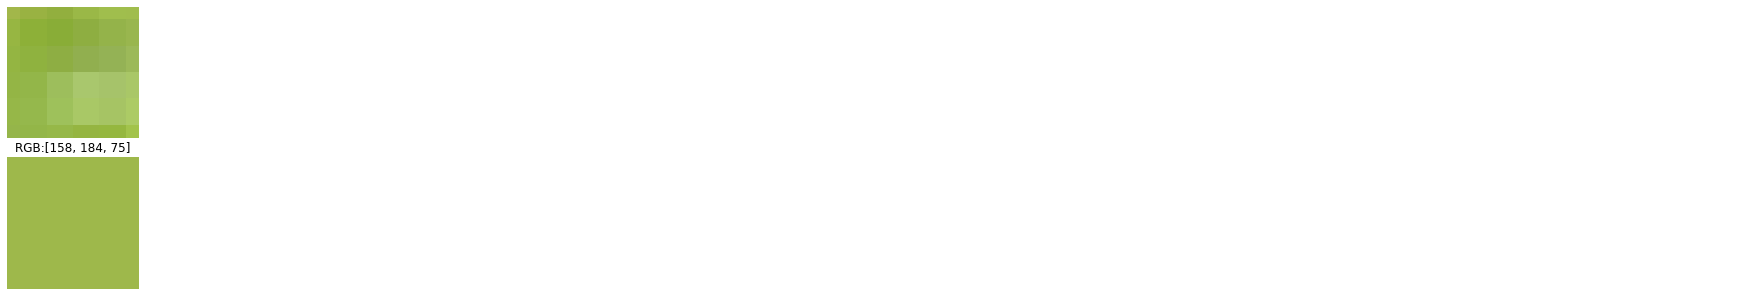

experiment color samples


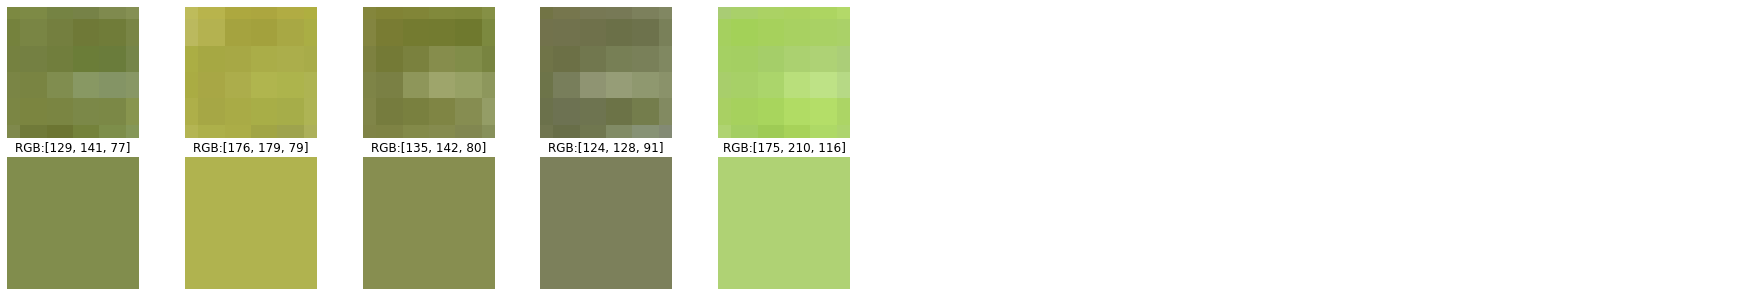

Round 0 BO Results
   Liquid A [uL]  Liquid B [uL]  Liquid C [uL]  RGB RMSE      R      G      B
0           64.0           87.0           49.0      30.0  130.0  142.0   78.0
1           48.0           44.0          108.0      11.0  176.0  179.0   79.0
2           67.0           86.0           47.0      28.0  136.0  142.0   80.0
3           78.0           95.0           27.0      39.0  124.0  128.0   92.0
4            8.0           41.0          151.0      29.0  176.0  210.0  116.0


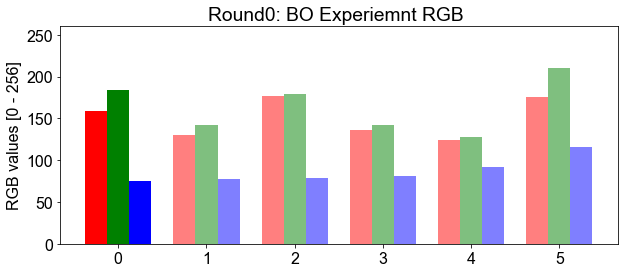

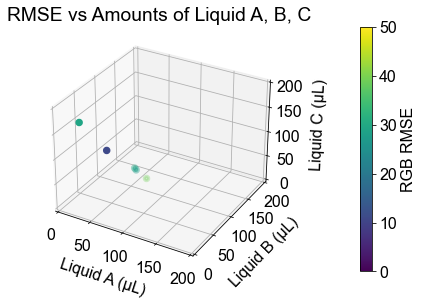

Iteration: BO_R1
Suggested Liquid Amount [µL]
   colorA [uL]  colorB [uL]  colorC [uL] dispense pos
0         72.0         44.0         84.0           D6
/data
['colorA [uL]' 'colorB [uL]' 'colorC [uL]' 'dispense pos']
[72.0]
[44.0]
[84.0]
['D6']
Picking up tip from B1 of Opentrons 96 Tip Rack 300 µL on 10
Logs from this command:
WARNING (util): Out of bounds move: X=(418.00000000000006 motor controller, 417.52637982768243 deck) too high for limit 418.0
Aspirating 55.0 uL from C5 of Corning 96 Well Plate 360 µL Flat on 8 at 92.86 uL/sec
Aspirating 72.0 uL from F8 of Opentrons 96 Tip Rack 300 µL on 9 at 46.43 uL/sec
Air gap
	Aspirating 10.0 uL from F8 of Opentrons 96 Tip Rack 300 µL on 9 at 92.86 uL/sec
Dispensing 137.0 uL into D6 of Corning 96 Well Plate 360 µL Flat on 4 at 92.86 uL/sec
Blowing out at D6 of Corning 96 Well Plate 360 µL Flat on 4
Mixing 1 times with a volume of 300.0 ul
	Aspirating 300.0 uL from C5 of Corning 96 Well Plate 360 µL Flat on 7 at 92.86 uL/sec
	Dispensing 30

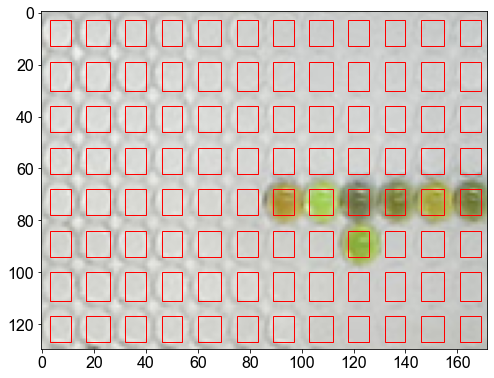

reference color sample


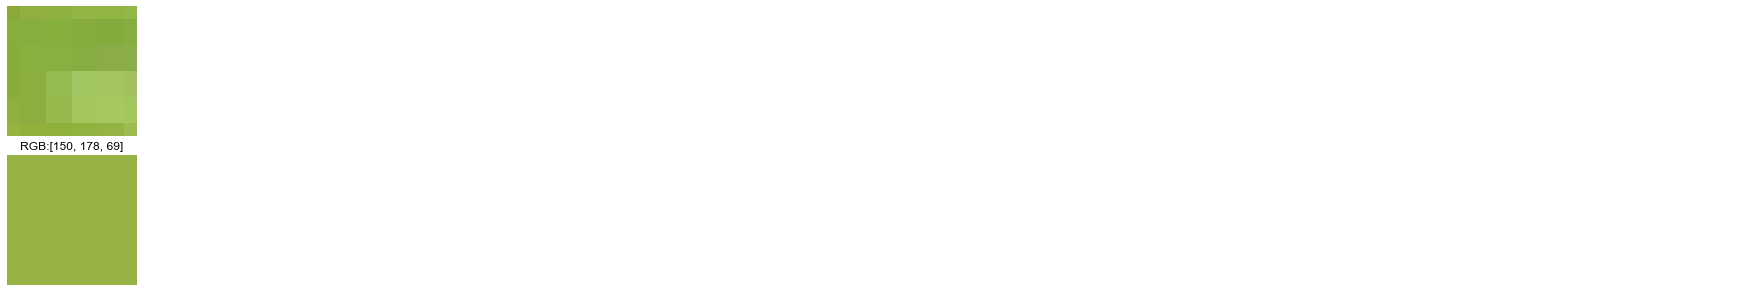

experiment color samples


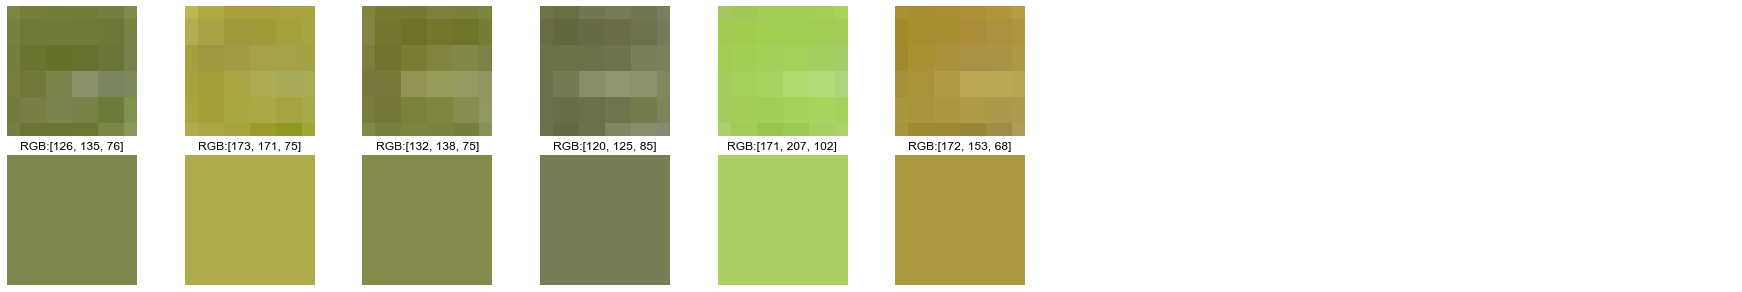

Round 1 BO Results
   Liquid A [uL]  Liquid B [uL]  Liquid C [uL]  RGB RMSE      R      G      B
0           64.0           87.0           49.0      29.0  126.0  135.0   76.0
1           48.0           44.0          108.0      14.0  173.0  171.0   75.0
2           67.0           86.0           47.0      26.0  132.0  138.0   75.0
3           78.0           95.0           27.0      36.0  120.0  126.0   86.0
4            8.0           41.0          151.0      28.0  171.0  207.0  102.0
5           72.0           44.0           84.0      19.0  172.0  154.0   68.0


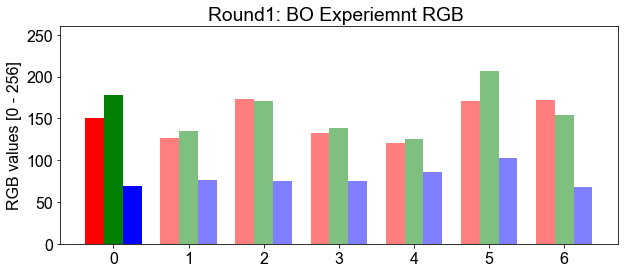

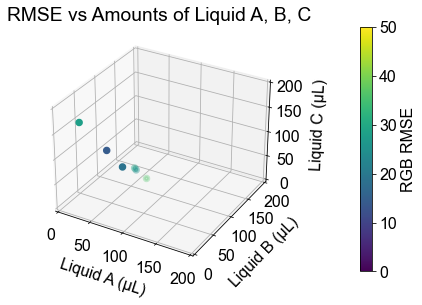

Iteration: BO_R2
Suggested Liquid Amount [µL]
   colorA [uL]  colorB [uL]  colorC [uL] dispense pos
0          3.0         44.0        153.0           D7
/data
['colorA [uL]' 'colorB [uL]' 'colorC [uL]' 'dispense pos']
[3.0]
[44.0]
[153.0]
['D7']
Picking up tip from B1 of Opentrons 96 Tip Rack 300 µL on 10
Logs from this command:
WARNING (util): Out of bounds move: X=(418.00000000000006 motor controller, 417.52637982768243 deck) too high for limit 418.0
Aspirating 55.0 uL from C5 of Corning 96 Well Plate 360 µL Flat on 8 at 92.86 uL/sec
Aspirating 3.0 uL from F8 of Opentrons 96 Tip Rack 300 µL on 9 at 46.43 uL/sec
Air gap
	Aspirating 10.0 uL from F8 of Opentrons 96 Tip Rack 300 µL on 9 at 92.86 uL/sec
Dispensing 68.0 uL into D7 of Corning 96 Well Plate 360 µL Flat on 4 at 92.86 uL/sec
Blowing out at D7 of Corning 96 Well Plate 360 µL Flat on 4
Mixing 1 times with a volume of 300.0 ul
	Aspirating 300.0 uL from C5 of Corning 96 Well Plate 360 µL Flat on 7 at 92.86 uL/sec
	Dispensing 300.

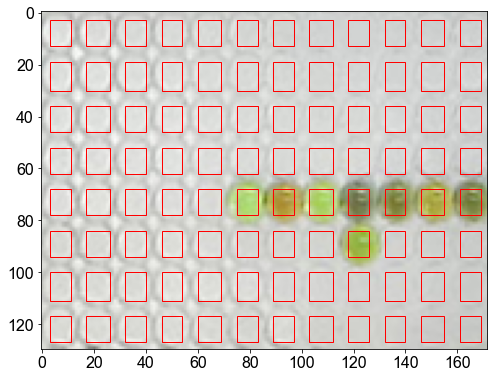

reference color sample


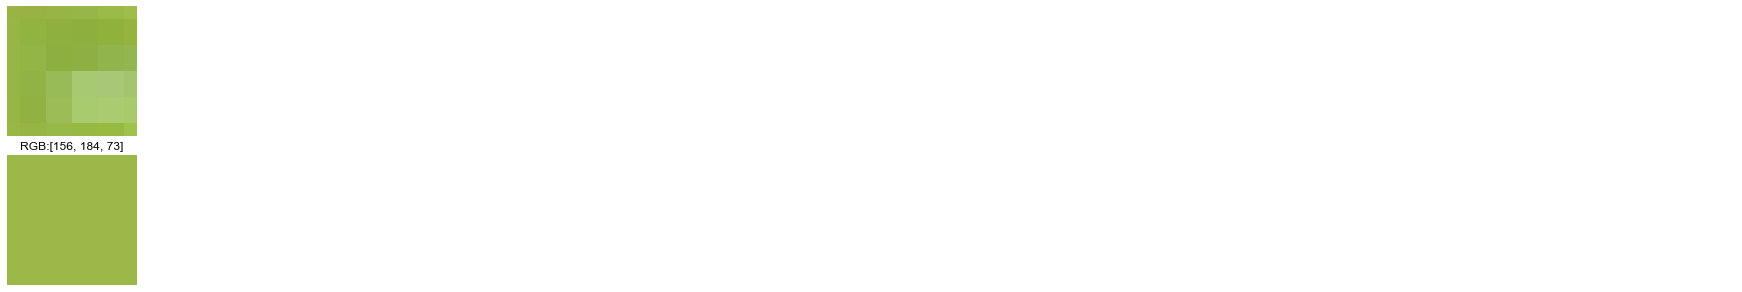

experiment color samples


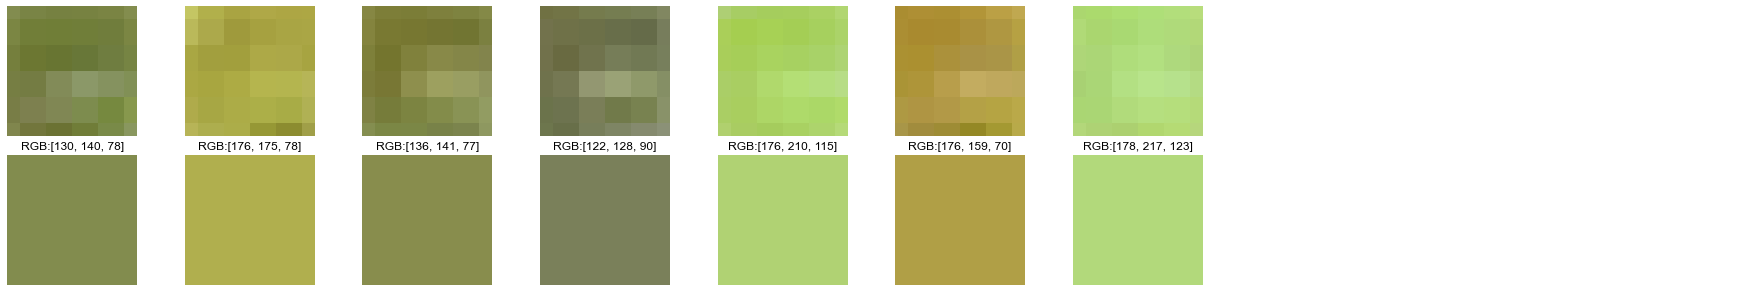

Round 2 BO Results
   Liquid A [uL]  Liquid B [uL]  Liquid C [uL]  RGB RMSE      R      G      B
0           64.0           87.0           49.0      30.0  130.0  140.0   78.0
1           48.0           44.0          108.0      13.0  176.0  176.0   78.0
2           67.0           86.0           47.0      27.0  136.0  142.0   78.0
3           78.0           95.0           27.0      39.0  122.0  128.0   90.0
4            8.0           41.0          151.0      31.0  176.0  210.0  115.0
5           72.0           44.0           84.0      19.0  176.0  159.0   70.0
6            3.0           44.0          153.0      37.0  178.0  217.0  123.0


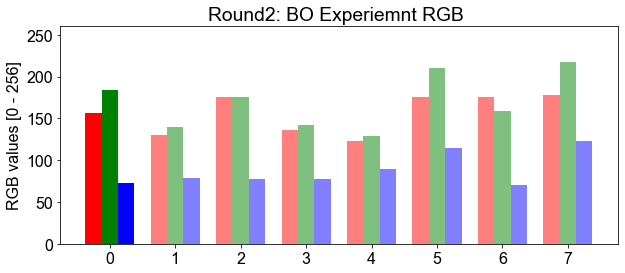

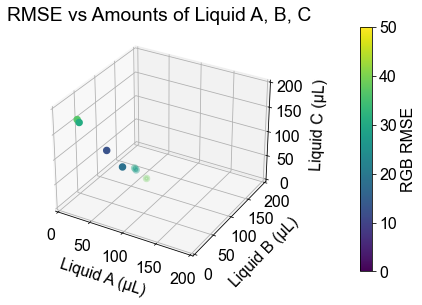

Iteration: BO_R3
Suggested Liquid Amount [µL]
   colorA [uL]  colorB [uL]  colorC [uL] dispense pos
0         56.0         41.0        104.0           D8
/data
['colorA [uL]' 'colorB [uL]' 'colorC [uL]' 'dispense pos']
[56.0]
[41.0]
[104.0]
['D8']
Picking up tip from B1 of Opentrons 96 Tip Rack 300 µL on 10
Logs from this command:
WARNING (util): Out of bounds move: X=(418.00000000000006 motor controller, 417.52637982768243 deck) too high for limit 418.0
Aspirating 55.0 uL from C5 of Corning 96 Well Plate 360 µL Flat on 8 at 92.86 uL/sec
Aspirating 56.0 uL from F8 of Opentrons 96 Tip Rack 300 µL on 9 at 46.43 uL/sec
Air gap
	Aspirating 10.0 uL from F8 of Opentrons 96 Tip Rack 300 µL on 9 at 92.86 uL/sec
Dispensing 121.0 uL into D8 of Corning 96 Well Plate 360 µL Flat on 4 at 92.86 uL/sec
Blowing out at D8 of Corning 96 Well Plate 360 µL Flat on 4
Mixing 1 times with a volume of 300.0 ul
	Aspirating 300.0 uL from C5 of Corning 96 Well Plate 360 µL Flat on 7 at 92.86 uL/sec
	Dispensing 3

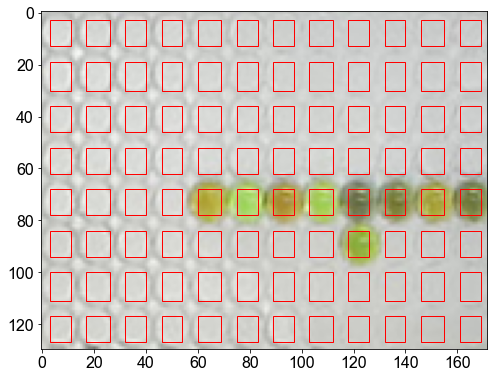

reference color sample


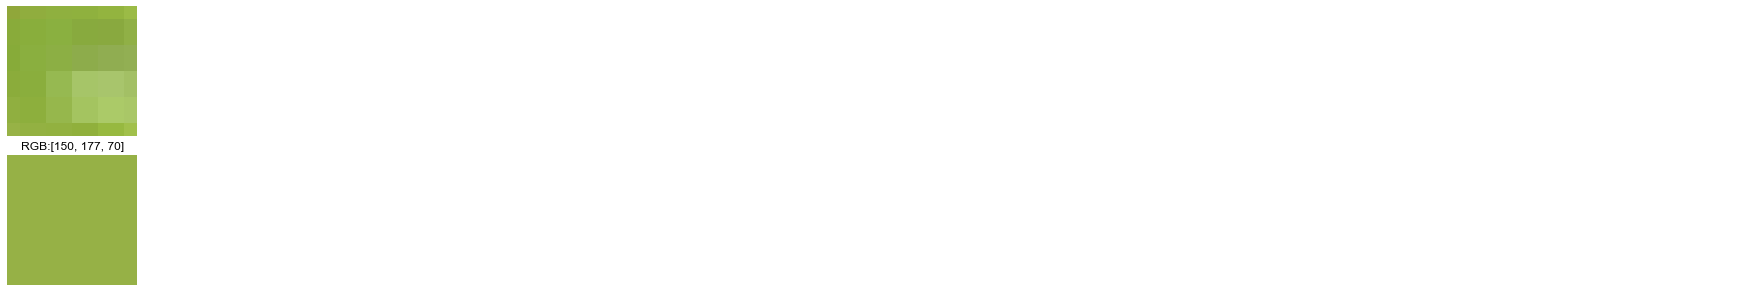

experiment color samples


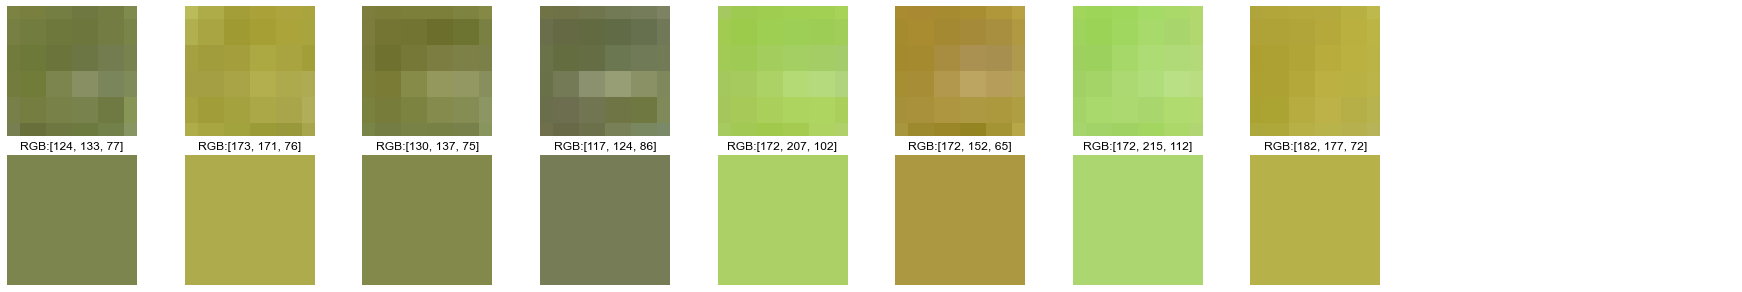

Round 3 BO Results
   Liquid A [uL]  Liquid B [uL]  Liquid C [uL]  RGB RMSE      R      G      B
0           64.0           87.0           49.0      30.0  124.0  133.0   77.0
1           48.0           44.0          108.0      14.0  173.0  171.0   76.0
2           67.0           86.0           47.0      26.0  130.0  137.0   75.0
3           78.0           95.0           27.0      37.0  117.0  124.0   86.0
4            8.0           41.0          151.0      29.0  172.0  207.0  102.0
5           72.0           44.0           84.0      19.0  172.0  152.0   65.0
6            3.0           44.0          153.0      35.0  172.0  216.0  112.0
7           56.0           41.0          104.0      19.0  182.0  177.0   72.0


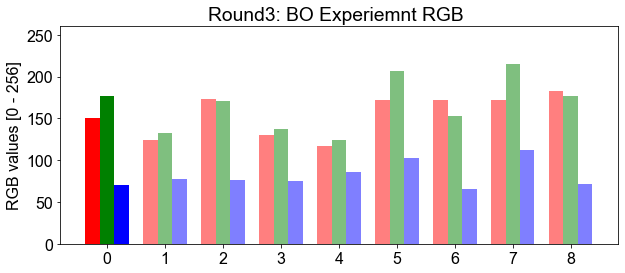

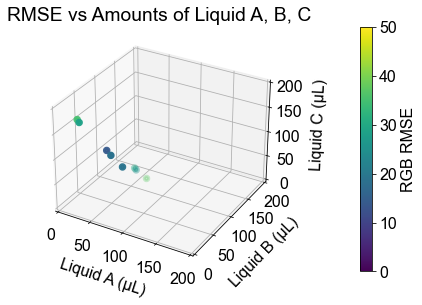

Iteration: BO_R4
Suggested Liquid Amount [µL]
   colorA [uL]  colorB [uL]  colorC [uL] dispense pos
0         55.0         46.0         98.0           D9
/data
['colorA [uL]' 'colorB [uL]' 'colorC [uL]' 'dispense pos']
[55.0]
[46.0]
[98.0]
['D9']
Picking up tip from B1 of Opentrons 96 Tip Rack 300 µL on 10
Logs from this command:
WARNING (util): Out of bounds move: X=(418.00000000000006 motor controller, 417.52637982768243 deck) too high for limit 418.0
Aspirating 55.0 uL from C5 of Corning 96 Well Plate 360 µL Flat on 8 at 92.86 uL/sec
Aspirating 55.0 uL from F8 of Opentrons 96 Tip Rack 300 µL on 9 at 46.43 uL/sec
Air gap
	Aspirating 10.0 uL from F8 of Opentrons 96 Tip Rack 300 µL on 9 at 92.86 uL/sec
Dispensing 120.0 uL into D9 of Corning 96 Well Plate 360 µL Flat on 4 at 92.86 uL/sec
Blowing out at D9 of Corning 96 Well Plate 360 µL Flat on 4
Mixing 1 times with a volume of 300.0 ul
	Aspirating 300.0 uL from C5 of Corning 96 Well Plate 360 µL Flat on 7 at 92.86 uL/sec
	Dispensing 30

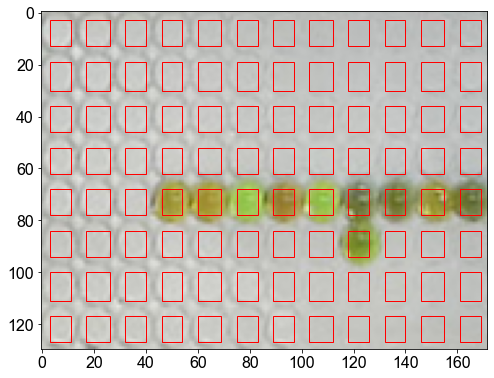

reference color sample


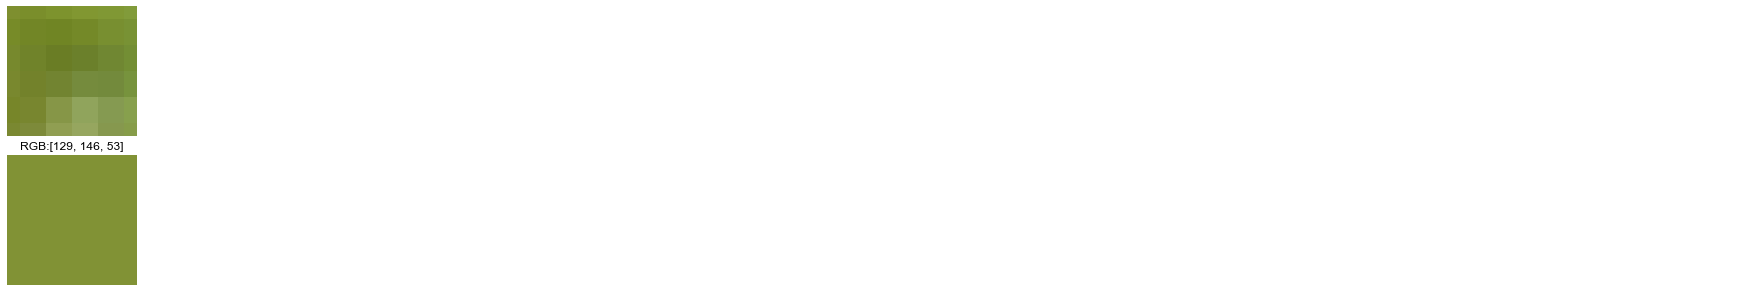

experiment color samples


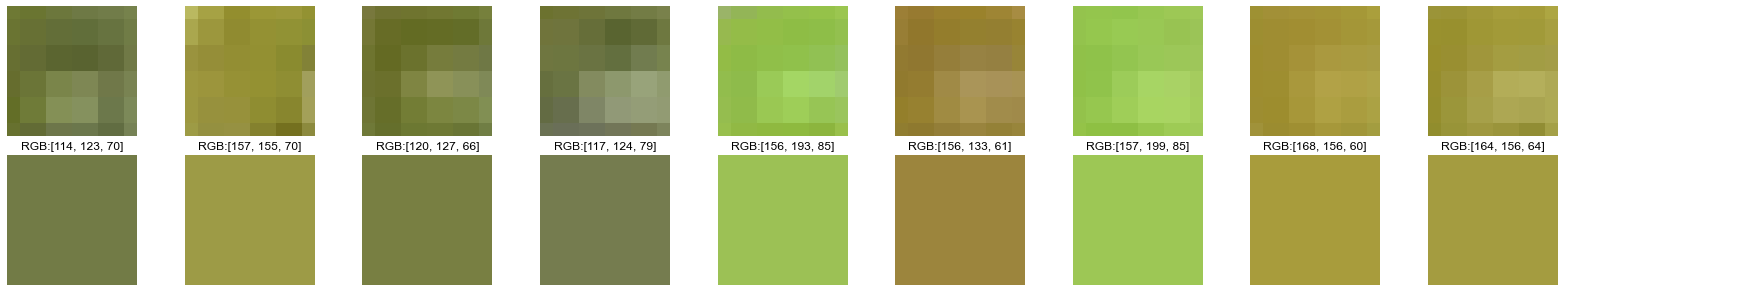

Round 4 BO Results
   Liquid A [uL]  Liquid B [uL]  Liquid C [uL]  RGB RMSE      R      G     B
0           64.0           87.0           49.0      19.0  114.0  123.0  70.0
1           48.0           44.0          108.0      20.0  157.0  155.0  70.0
2           67.0           86.0           47.0      14.0  120.0  127.0  66.0
3           78.0           95.0           27.0      21.0  117.0  124.0  79.0
4            8.0           41.0          151.0      36.0  156.0  193.0  85.0
5           72.0           44.0           84.0      18.0  156.0  134.0  61.0
6            3.0           44.0          153.0      39.0  157.0  199.0  85.0
7           56.0           41.0          104.0      24.0  168.0  156.0  60.0
8           55.0           46.0           98.0      22.0  164.0  156.0  64.0


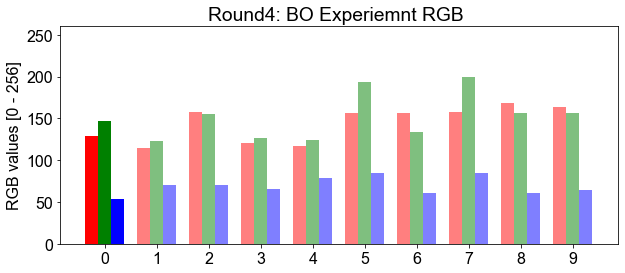

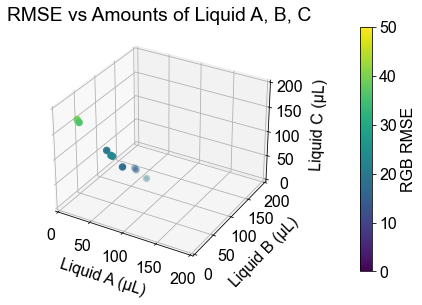

Iteration: BO_R5
Suggested Liquid Amount [µL]
   colorA [uL]  colorB [uL]  colorC [uL] dispense pos
0        195.0          4.0          1.0          D10
/data
['colorA [uL]' 'colorB [uL]' 'colorC [uL]' 'dispense pos']
[195.0]
[4.0]
[1.0]
['D10']
Picking up tip from B1 of Opentrons 96 Tip Rack 300 µL on 10
Logs from this command:
WARNING (util): Out of bounds move: X=(418.00000000000006 motor controller, 417.52637982768243 deck) too high for limit 418.0
Aspirating 55.0 uL from C5 of Corning 96 Well Plate 360 µL Flat on 8 at 92.86 uL/sec
Aspirating 195.0 uL from F8 of Opentrons 96 Tip Rack 300 µL on 9 at 46.43 uL/sec
Air gap
	Aspirating 10.0 uL from F8 of Opentrons 96 Tip Rack 300 µL on 9 at 92.86 uL/sec
Dispensing 260.0 uL into D10 of Corning 96 Well Plate 360 µL Flat on 4 at 92.86 uL/sec
Blowing out at D10 of Corning 96 Well Plate 360 µL Flat on 4
Mixing 1 times with a volume of 300.0 ul
	Aspirating 300.0 uL from C5 of Corning 96 Well Plate 360 µL Flat on 7 at 92.86 uL/sec
	Dispensing

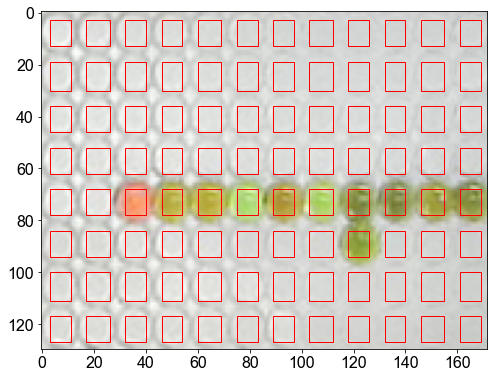

reference color sample


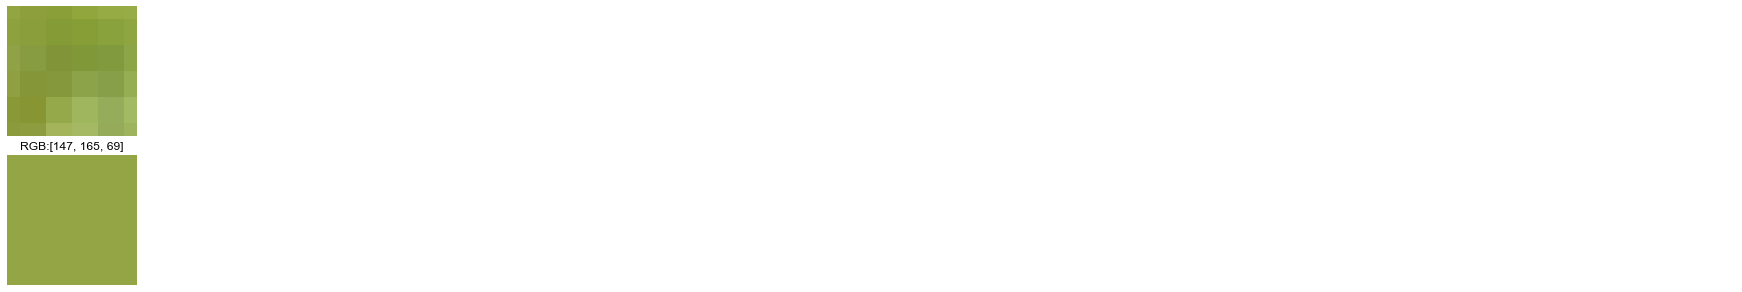

experiment color samples


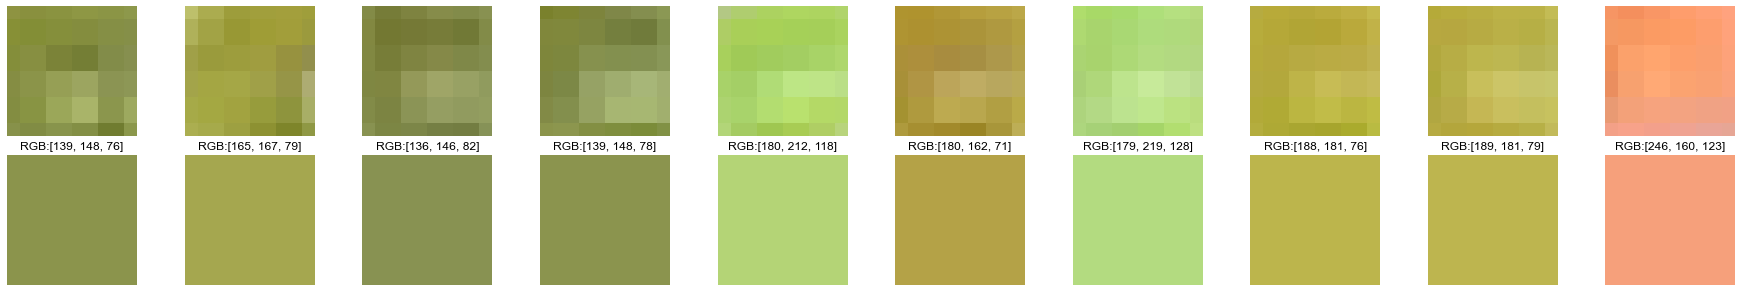

Round 5 BO Results
   Liquid A [uL]  Liquid B [uL]  Liquid C [uL]  RGB RMSE      R      G      B
0           64.0           87.0           49.0      11.0  139.0  148.0   76.0
1           48.0           44.0          108.0      12.0  166.0  168.0   79.0
2           67.0           86.0           47.0      15.0  136.0  146.0   82.0
3           78.0           95.0           27.0      12.0  139.0  148.0   78.0
4            8.0           41.0          151.0      44.0  180.0  212.0  118.0
5           72.0           44.0           84.0      19.0  180.0  162.0   72.0
6            3.0           44.0          153.0      50.0  179.0  220.0  128.0
7           56.0           41.0          104.0      26.0  188.0  181.0   76.0
8           55.0           46.0           98.0      26.0  189.0  181.0   79.0
9          195.0            4.0            1.0      65.0  246.0  160.0  123.0


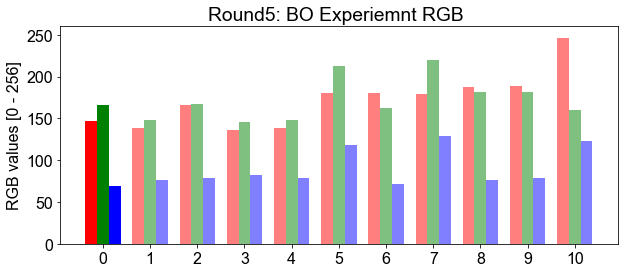

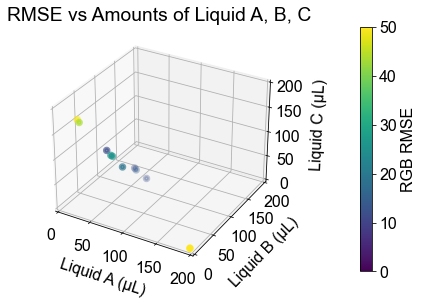

Iteration: BO_R6
Suggested Liquid Amount [µL]
   colorA [uL]  colorB [uL]  colorC [uL] dispense pos
0         35.0         94.0         70.0          D11
/data
['colorA [uL]' 'colorB [uL]' 'colorC [uL]' 'dispense pos']
[35.0]
[94.0]
[70.0]
['D11']
Picking up tip from B1 of Opentrons 96 Tip Rack 300 µL on 10
Logs from this command:
WARNING (util): Out of bounds move: X=(418.00000000000006 motor controller, 417.52637982768243 deck) too high for limit 418.0
Aspirating 55.0 uL from C5 of Corning 96 Well Plate 360 µL Flat on 8 at 92.86 uL/sec
Aspirating 35.0 uL from F8 of Opentrons 96 Tip Rack 300 µL on 9 at 46.43 uL/sec
Air gap
	Aspirating 10.0 uL from F8 of Opentrons 96 Tip Rack 300 µL on 9 at 92.86 uL/sec
Dispensing 100.0 uL into D11 of Corning 96 Well Plate 360 µL Flat on 4 at 92.86 uL/sec
Blowing out at D11 of Corning 96 Well Plate 360 µL Flat on 4
Mixing 1 times with a volume of 300.0 ul
	Aspirating 300.0 uL from C5 of Corning 96 Well Plate 360 µL Flat on 7 at 92.86 uL/sec
	Dispensing

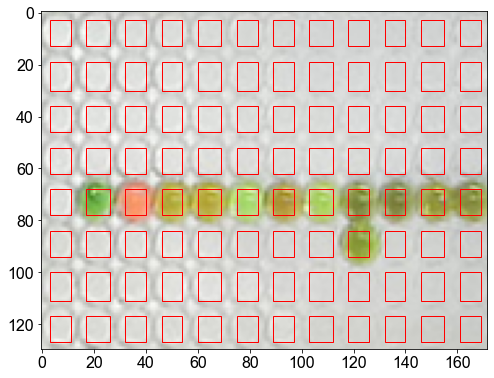

reference color sample


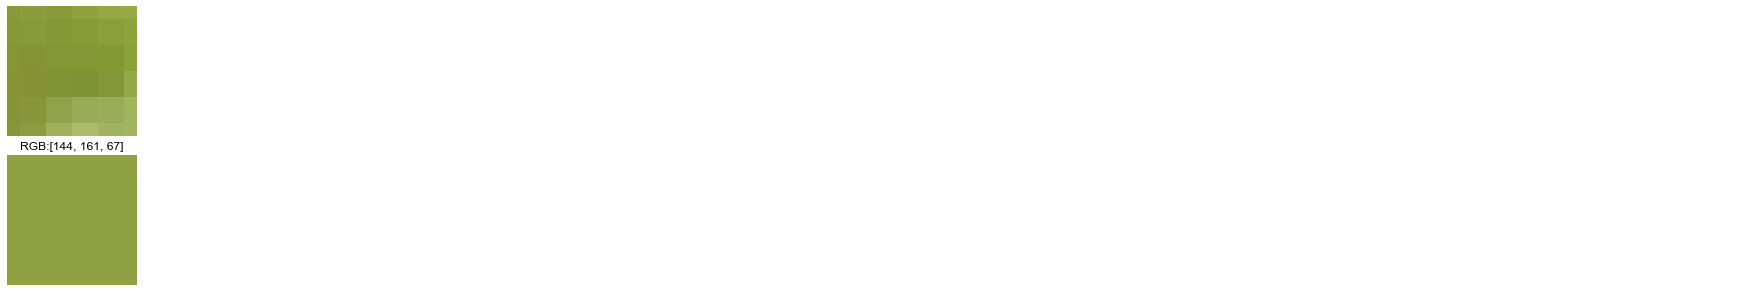

experiment color samples


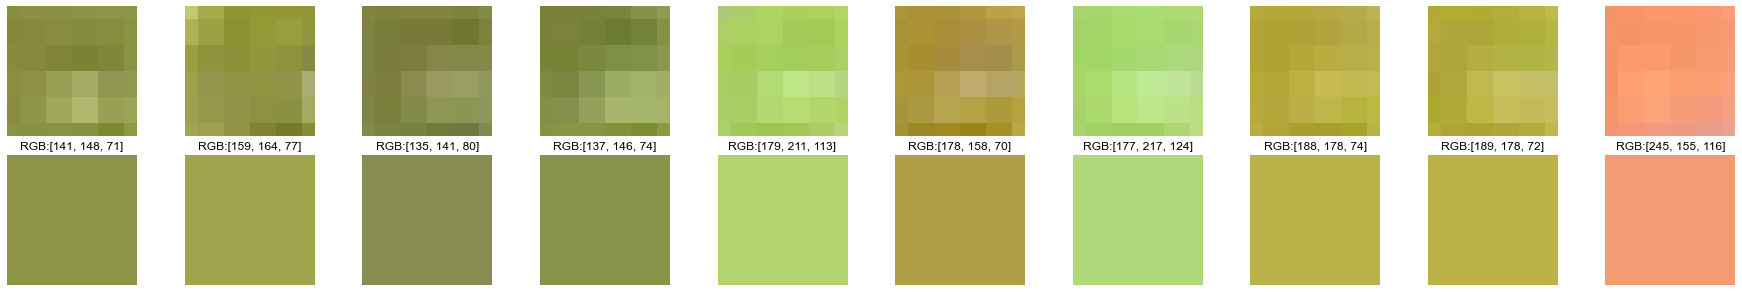

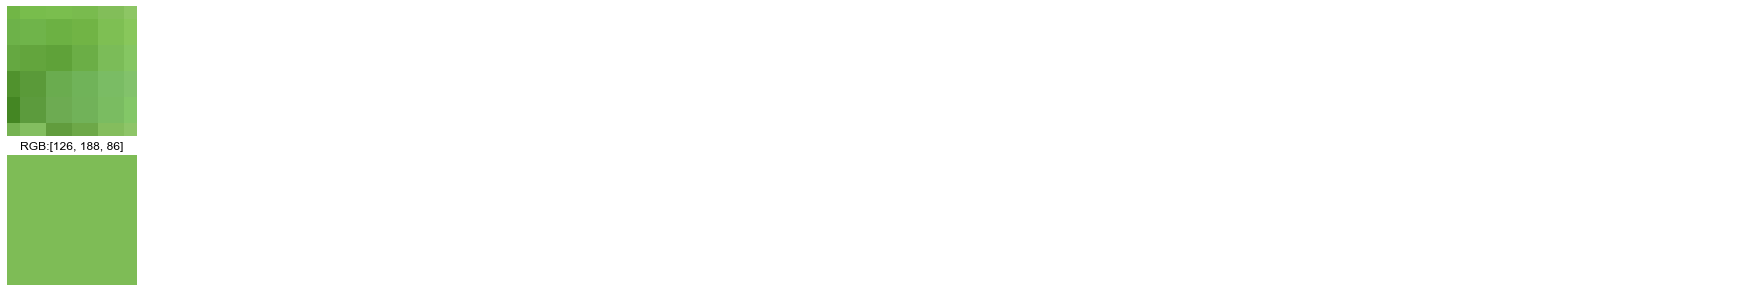

Round 6 BO Results
    Liquid A [uL]  Liquid B [uL]  Liquid C [uL]  RGB RMSE      R      G      B
0            64.0           87.0           49.0       8.0  142.0  148.0   72.0
1            48.0           44.0          108.0      11.0  160.0  164.0   77.0
2            67.0           86.0           47.0      15.0  136.0  142.0   80.0
3            78.0           95.0           27.0      11.0  137.0  146.0   74.0
4             8.0           41.0          151.0      44.0  179.0  211.0  114.0
5            72.0           44.0           84.0      20.0  178.0  158.0   70.0
6             3.0           44.0          153.0      50.0  178.0  217.0  124.0
7            56.0           41.0          104.0      27.0  188.0  178.0   74.0
8            55.0           46.0           98.0      28.0  189.0  178.0   72.0
9           195.0            4.0            1.0      65.0  246.0  155.0  116.0
10           35.0           94.0           70.0      22.0  126.0  188.0   86.0


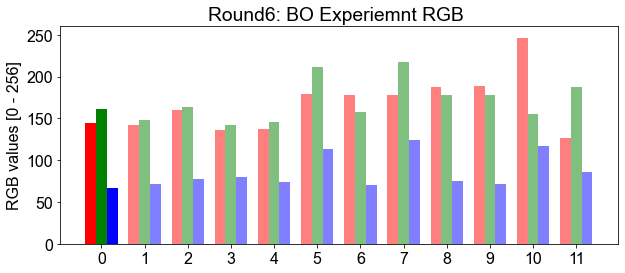

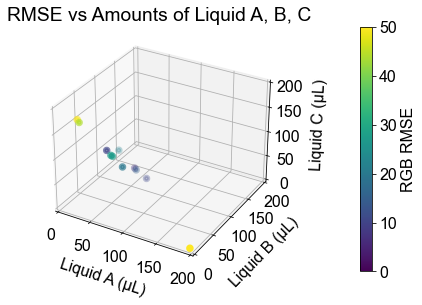

Iteration: BO_R7
Suggested Liquid Amount [µL]
   colorA [uL]  colorB [uL]  colorC [uL] dispense pos
0         55.0        143.0          1.0          D12
/data
['colorA [uL]' 'colorB [uL]' 'colorC [uL]' 'dispense pos']
[55.0]
[143.0]
[1.0]
['D12']
Picking up tip from B1 of Opentrons 96 Tip Rack 300 µL on 10
Logs from this command:
WARNING (util): Out of bounds move: X=(418.00000000000006 motor controller, 417.52637982768243 deck) too high for limit 418.0
Aspirating 55.0 uL from C5 of Corning 96 Well Plate 360 µL Flat on 8 at 92.86 uL/sec
Aspirating 55.0 uL from F8 of Opentrons 96 Tip Rack 300 µL on 9 at 46.43 uL/sec
Air gap
	Aspirating 10.0 uL from F8 of Opentrons 96 Tip Rack 300 µL on 9 at 92.86 uL/sec
Dispensing 120.0 uL into D12 of Corning 96 Well Plate 360 µL Flat on 4 at 92.86 uL/sec
Blowing out at D12 of Corning 96 Well Plate 360 µL Flat on 4
Mixing 1 times with a volume of 300.0 ul
	Aspirating 300.0 uL from C5 of Corning 96 Well Plate 360 µL Flat on 7 at 92.86 uL/sec
	Dispensing

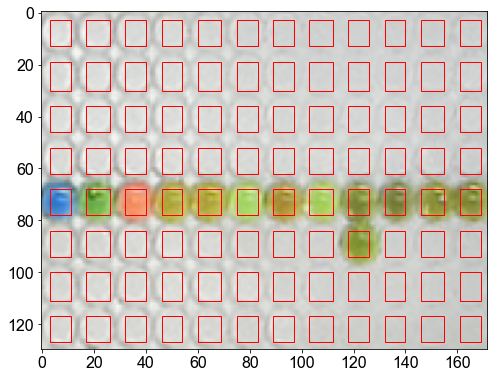

reference color sample


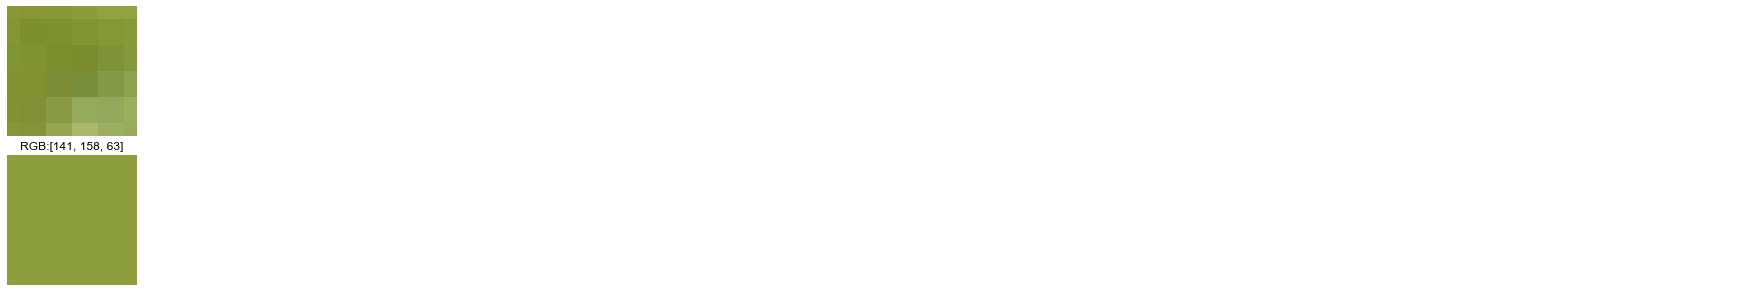

experiment color samples


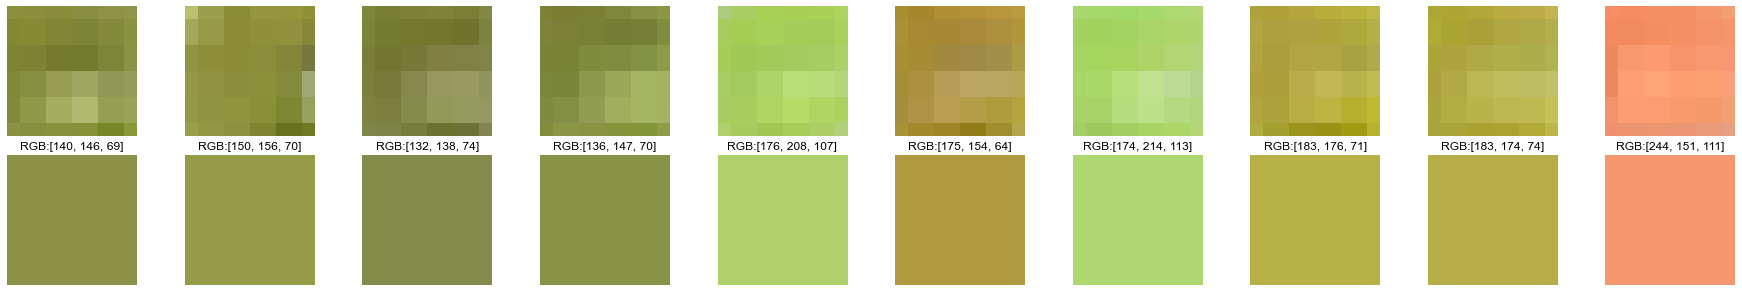

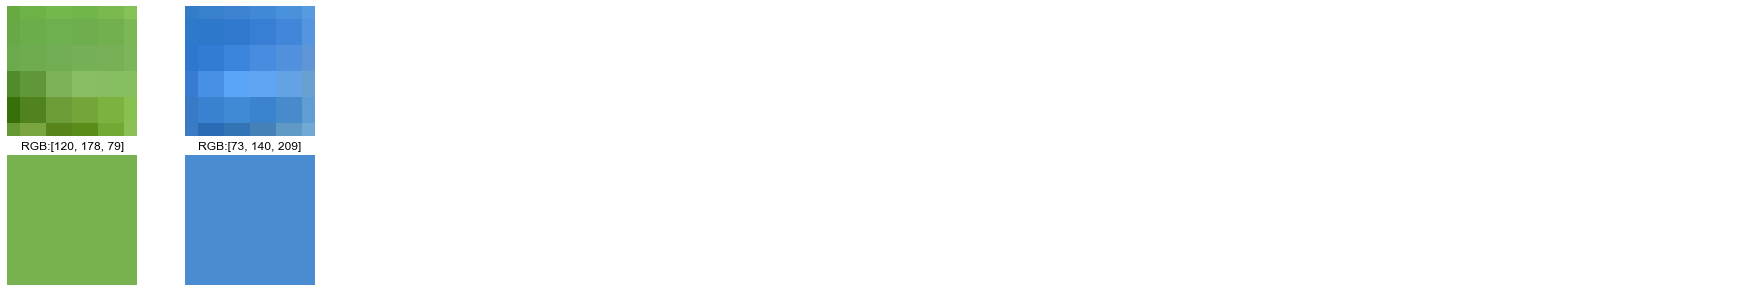

Round 7 BO Results
    Liquid A [uL]  Liquid B [uL]  Liquid C [uL]  RGB RMSE      R      G      B
0            64.0           87.0           49.0       8.0  140.0  146.0   69.0
1            48.0           44.0          108.0       7.0  150.0  156.0   70.0
2            67.0           86.0           47.0      14.0  132.0  138.0   74.0
3            78.0           95.0           27.0       8.0  136.0  147.0   70.0
4             8.0           41.0          151.0      43.0  176.0  208.0  107.0
5            72.0           44.0           84.0      20.0  175.0  154.0   64.0
6             3.0           44.0          153.0      48.0  174.0  214.0  114.0
7            56.0           41.0          104.0      27.0  183.0  176.0   71.0
8            55.0           46.0           98.0      27.0  184.0  174.0   74.0
9           195.0            4.0            1.0      66.0  244.0  151.0  112.0
10           35.0           94.0           70.0      19.0  120.0  178.0   79.0
11           55.0          143.0 

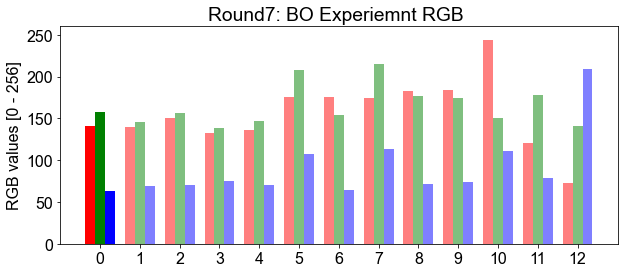

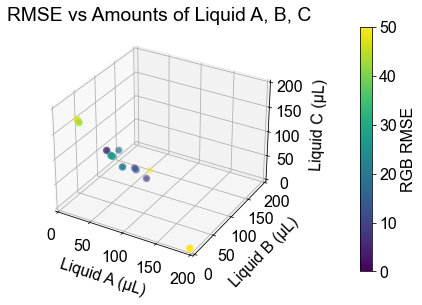

Iteration: BO_R8
Suggested Liquid Amount [µL]
   colorA [uL]  colorB [uL]  colorC [uL] dispense pos
0        140.0         60.0          0.0           E1
/data
['colorA [uL]' 'colorB [uL]' 'colorC [uL]' 'dispense pos']
[140.0]
[60.0]
[0.0]
['E1']
Picking up tip from B1 of Opentrons 96 Tip Rack 300 µL on 10
Logs from this command:
WARNING (util): Out of bounds move: X=(418.00000000000006 motor controller, 417.52637982768243 deck) too high for limit 418.0
Aspirating 55.0 uL from C5 of Corning 96 Well Plate 360 µL Flat on 8 at 92.86 uL/sec
Aspirating 140.0 uL from F8 of Opentrons 96 Tip Rack 300 µL on 9 at 46.43 uL/sec
Air gap
	Aspirating 10.0 uL from F8 of Opentrons 96 Tip Rack 300 µL on 9 at 92.86 uL/sec
Dispensing 205.0 uL into E1 of Corning 96 Well Plate 360 µL Flat on 4 at 92.86 uL/sec
Blowing out at E1 of Corning 96 Well Plate 360 µL Flat on 4
Mixing 1 times with a volume of 300.0 ul
	Aspirating 300.0 uL from C5 of Corning 96 Well Plate 360 µL Flat on 7 at 92.86 uL/sec
	Dispensing 3

In [ ]:
ref_pos = 'C4'
init_pos = 'D1'

X_new = X_init
X = []
for i in range(20):
    ####################################################
    ## Saving the new conditions
    header = ["colorA [uL]", "colorB [uL]", "colorC [uL]"]
    df_Xnew = pd.DataFrame(np.around(X_new*200), columns = header)
    dispense_pos = utils.get_dispense_positions(init_pos[0]+str(int(init_pos[1:])+len(X)), 
                                                len(X_new))
    df_Xnew['dispense pos'] = dispense_pos
    BO_csv = "BO_R"+str(i)+"_conditions.csv"
    df_Xnew.to_csv('.\\data\\'+BO_csv, index=False)
    print('Iteration:',BO_csv[:5])
    print("Suggested Liquid Amount [µL]")   
    print(df_Xnew)
    if X ==[]:
        X = X_new
    else:
        X = np.concatenate([X, X_new])
        
    ####################################################
    # run the protocol on OT2
    ssh.transfer_and_simulate_protocol(OT2_IP, BO_csv, 'color_mixing.py')
    ssh.run_protocol(OT2_IP, 'color_mixing.py')
    
    timestr = time.strftime("_%Y%m%d_%H%M%S")
    image_name = BO_csv[:-4]+timestr+'.jpg'
    ssh.ssh_take_an_image(OT2_IP, image_name)

    ####################################################
    ## image processing and RGB extraction
    image_ROI = imp.image_extractor(image_name)

    refs_pos = [ref_pos]
    print("reference color sample")
    rgb_ref = imp.get_rgb_from_samples(image_ROI, refs_pos)[0]
    samples_pos = utils.get_dispense_positions(init_pos, len(X))
    print("experiment color samples")
    rgb_list = imp.get_rgb_from_samples(image_ROI, samples_pos)
    RGB_ref = np.array(rgb_ref)
    RGB_exp = np.array(rgb_list)
    
    Y = utils.MSE_func(RGB_exp, RGB_ref)
    ####################################################
    ## Data Processing and Saving 
    df_X= pd.DataFrame(np.append(np.around(np.append(X*200, np.sqrt(Y), axis=1),0),
                                    np.around(RGB_exp,0), axis = 1),
                          columns = ['Liquid A [uL]','Liquid B [uL]', 'Liquid C [uL]',
                                     'RGB RMSE', 'R', 'G', 'B'])
    print('Round', i, 'BO Results')
    print(df_X)
    
    timestr = time.strftime("_%Y%m%d_%H%M%S")
    df_X.to_csv('.\\archive\\'+'BO_R'+str(i)+'_results'+timestr+'.csv', index=False)
    df_Xnew.to_csv('.\\archive\\'+'BO_R'+str(i)+'conditions'+timestr+'.csv', index=False)
    
    ####################################################
    ## Bayesian Optimization run 
    optimizer = gpyopt.optimizer_func(X, Y, batch_size)
    next_acqui = optimizer.suggest_next_locations()
    utils.barplot_RGB(RGB_ref, RGB_exp,'Round'+str(i)+': BO Experiemnt RGB ')
    utils.MSE_RGB_3Dplot(X*200, Y, 'iteration '+str(i)) 

    X_new = next_acqui

### RGB RMSE at each iteration 

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6,5))
font = {'family': 'Arial', 'size': 20}
plt.rc('font', **font)
ax.plot(np.arange(len(np.sqrt(Y))), np.minimum.accumulate(np.sqrt(Y)), 
           marker = 'o', ms = 1, c = 'black', alpha = 0.5)
ax.scatter(np.arange(len(np.sqrt(Y))), np.sqrt(Y), c = 'darkcyan')

ax.set_ylabel('Current Lowest RMSE')
ax.set_xlim(0, len(np.sqrt(Y))+5)
ax.set_ylim(10, 75)

plt.show()



### The top recipes to get the closest RGB reference¶

In [ ]:
x = np.transpose(np.round(X*200,0))
y = np.round(np.sqrt(np.transpose(Y)),1)
z = np.transpose(np.round(RGB_exp,0))
evals = pd.DataFrame(np.transpose(np.append(np.append(x, y, axis=0),z, axis = 0)))
evals = evals.sort_values(by=[3])
evals.columns = ['Liquid A [µL]', 'Liquid B [µL]', 'Liquid C [µL]', 'RGB RMSE', 'R', 'G', 'B']
evals.head(5)